In [1]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


In [2]:
using JLD, CairoMakie, GLMakie

In [3]:
path = "C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\2М Карта спектра Ляпуновских показателей\\200x200";
filenameLS = "\\LSs_200x200.jld"
filenameu0s = "\\u0s_200x200.jld"
pathLS = path*filenameLS
pathu0s = path*filenameu0s;

In [10]:
Λs = load(pathLS)["data"];

In [11]:
I0range = range( -1.40, -1.709, length = 201 )
U0range = range( 0.3,  0.47, length = 201)

0.3:0.00085:0.47

In [12]:
color_matrix = zeros(201, 201);

In [96]:
idxI0, idxU0 = 45, 40
Λs[idxI0, idxU0, :], I0range[idxI0], U0range[idxU0]

([0.003518791300939144, -0.03200926803926721, -5.237804663711276], -1.46798, 0.33315)

In [73]:
function check_condition(spectrum)
    
    checknull(spectrum[1]) && checknull(spectrum[2])  && spectrum[3]<0 ? color = 0 :
    checknull(spectrum[1]) && spectrum[2]<0  ? color = 1 :
    spectrum[1]>0  && checknull(spectrum[2])  && spectrum[3]<0 ? color = 3 :
    -1
    
end

function checknull(value)
    isapprox(value, 0.0; atol = 1e-1)
end

checknull (generic function with 1 method)

In [74]:
for (i, k1) in enumerate(I0range)
    
    for (j, k2) in enumerate(U0range)
        spectrum = Λs[i, j, :]
        color_matrix[i, j] = check_condition(spectrum)
    end
end

In [95]:
idxI0, idxU0 = 45, 40
color_matrix[idxI0, idxU0], I0range[idxI0], U0range[idxU0] 

(0.0, -1.46798, 0.33315)

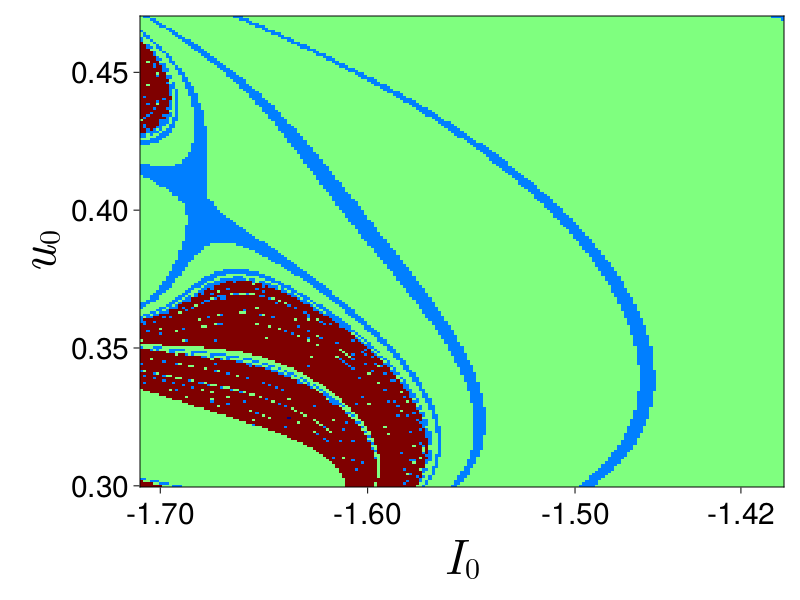

CairoMakie.Screen{IMAGE}


In [104]:
CairoMakie.activate!()

f = Figure()
ax1 = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"u_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = 30, yticklabelsize = 30,
            xgridvisible  = false, ygridvisible = false, xticks = [-1.7, -1.6, -1.5, -1.42])

heatmap!(I0range, U0range, color_matrix, colormap = :jet)

#Colorbar(fig[1, 2], hm, ticklabelsize = 35)
display(f)

In [106]:
save("map_LS.eps", f)

CairoMakie.Screen{EPS}
